## CPU ( PySchedule, QBsolve, Neal, Fujitsu CPU )

In [1]:
import sys
import wikipedia
import numpy as np
import pandas as pd

from qubo_util import *

In [2]:
config = Config(configpath="C:\\Users\\Viktoria\\UQO\\install\\config.json")
connection = config.create_connection()

## Jobs Info

In [3]:
### Lets define the basics

bend = [0, 1, 2]
weld = [3, 4]
paint =  [5]

bend_length = 2
weld_length = 3
paint_length = 6

t_step = 3
t_step_in_sec = 30

In [4]:
jobs5k = [(0, 0, 1, 12, 8, 18),
 (1, 0, 5, 9, 0, 13),
 (1, 1, 9, 1, 5, 13),
 (2, 0, 1, 9, 3, 20),
 (3, 0, 4, 14, 3, 35),
 (3, 1, 1, 11, 0, 35),
 (4, 0, 5, 4, 6, 32),
 (4, 1, 9, 13, 6, 32)]
operations = job_info(jobs5k, bend_length, weld_length, paint_length, t_step_in_sec, bend, weld, paint, t_step)

The maximal maketime for the given operations is: 11550 second(s).
Which is equal to: 385 time steps.


Anzahl an Kombinationen: 5004

   order  part  bend  weld  paint  deadline
0      0     0     2    36     48       108
1      1     0    10    27      0        78
2      1     1    18     3     30        78
3      2     0     2    27     18       120
4      3     0     8    42     18       210
5      3     1     2    33      0       210
6      4     0    10    12     36       192
7      4     1    18    39     36       192


In [6]:
jobs = jobs5k

## Parameter

In [19]:
# for DWave
numr = 10  # Number of samples / quantum computations
#chainStrength is defined als max absolute value in QUBO (see find_chstr(QUBO))


#for QUBO
alpha = 2
beta = 1.5
gamma = 2
delta = 0.035
    

## Classic PySchedule for jobs5k

c:\users\viktoria\appdata\local\programs\python\python38\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


INFO: execution time for solving mip (sec) = 2.392414093017578
INFO: objective = 53.0
[(bend1, BendMachine2, 0, 8), (bend2, BendMachine1, 0, 4), (weld2, WeldMachine2, 6, 24), (weld1, WeldMachine1, 8, 17), (paint1, PaintMachine, 17, 53), (MakeSpan, BendMachine1, 53, 54)]


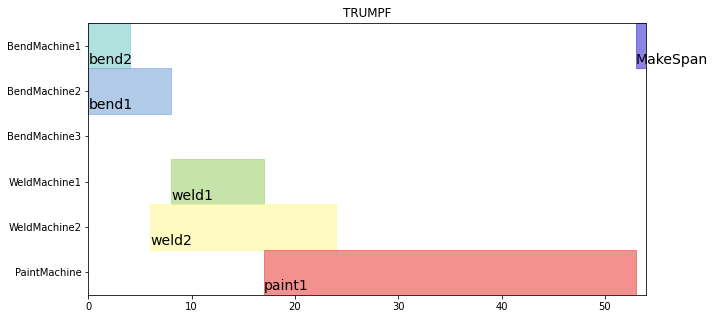

In [9]:
#Classic for 100

# Load pyschedule and create a scenario with ten steps planning horizon
from pyschedule import Scenario, solvers, plotters
S = Scenario('TRUMPF',horizon=120)

# Create six resources -our machines
BendMachine1, BendMachine2, BendMachine3, WeldMachine1, WeldMachine2, PaintMachine = S.Resource('BendMachine1'), S.Resource('BendMachine2'), S.Resource('BendMachine3'), S.Resource('WeldMachine1'), S.Resource('WeldMachine2'), S.Resource('PaintMachine')


# Create three tasks with lengths 1,2 and 3
bend1, weld1, paint1, bend2, weld2  = S.Task('bend1',8), S.Task('weld1',9), S.Task('paint1',36), S.Task('bend2',4), S.Task('weld2',18)


# Assign tasks to resources, either of our six machines
# the %-operator connects tasks and resource



##Assign precedence

S += bend1< weld1, weld1 <paint1
S += bend2< weld2


##Assign Ressources
#Bending
S += bend1 % BendMachine1|BendMachine2|BendMachine3
S += bend2 % BendMachine1|BendMachine2|BendMachine3



#Welding
S += weld1 % WeldMachine1|WeldMachine2
S += weld2 % WeldMachine1|WeldMachine2



#Painting
S += paint1% PaintMachine



# Solve and print solution
S.use_makespan_objective()
solvers.pulp.solve(S,msg=1)

# Print the solution
print(S.solution())
%matplotlib inline
plotters.matplotlib.plot(S,fig_size=(10,5))

## QUBO

In [ ]:
QUBO = get_QUBO(jobs, operations, alpha, beta, gamma, delta, bend_length, weld_length, paint_length, bend, weld, paint)

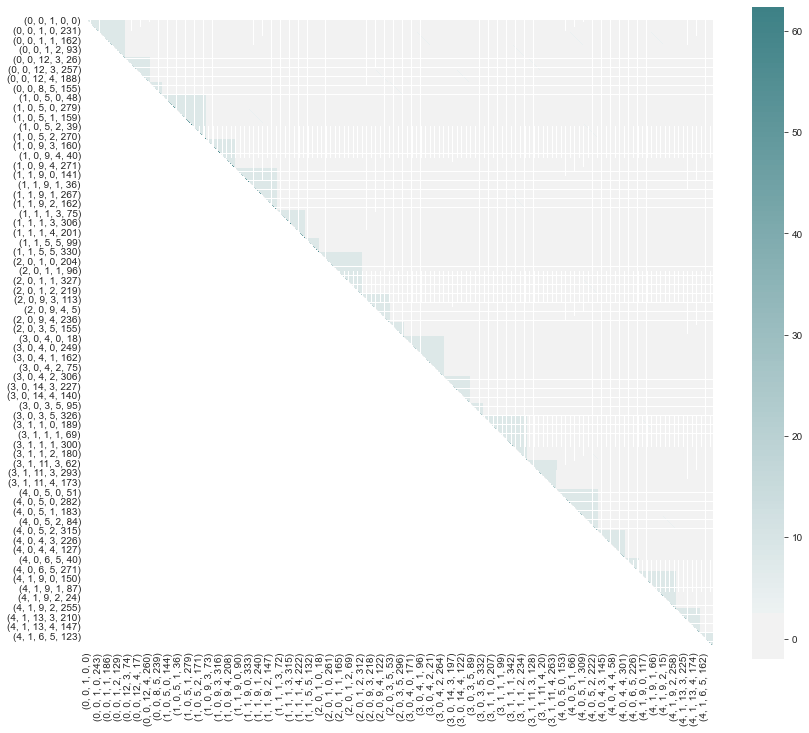

In [11]:
get_qubo_heatmap(QUBO, operations, "QUBO")

In [ ]:
qubo_dictionary = qubo_to_dictionary_ohne_null(QUBO, operations)

## QBsolv

In [ ]:
#QBsolve
sampleset_QB = on_QBsolve(qubo_dictionary)

In [ ]:
print(sampleset_QB)

In [ ]:
sample_nmr = 0
df_schedule = make_schedule_from_sample(jobs, operations, sampleset_QB, sample_nmr, bend_length, weld_length, paint_length)

In [ ]:
df_schedule

In [ ]:
get_qubo_ganttchart(df_schedule)

In [17]:
schedule = get_results(sampleset_QB, operations, sample_nmr)
check_constraints(schedule, jobs, paint_length, bend_length, weld_length)

H_0 erfüllt: False
H_1 erfüllt: True
H_2 erfüllt: True
H_3 erfüllt: True


## DWave Simulator Neal

In [19]:
#DWave Simulator
#for QUBO
numr = 1000
sampleset_neal = on_DWave_simulator(QUBO, numr)

In [20]:
print(sampleset_neal)

     0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 ... 104 energy num_oc.
2    0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ...   0  -10.0       1
4    0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...   0  -10.0       1
8    0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0 ...   0  -10.0       1
9    0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0 ...   0  -10.0       1
12   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ...   0  -10.0       1
14   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...   0  -10.0       1
15   0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0 ...   0  -10.0       1
18   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ...   0  -10.0       1
20   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0 ...   0  -10.0       1
22   1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 ...   0  -10.0       1
23   0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0 ...   0  -10.0       1
27   0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0 ...   0  

In [21]:
sample_nmr = 0
df_schedule = make_schedule_from_sample(jobs, operations, sampleset_neal, sample_nmr, bend_length, weld_length, paint_length)

In [22]:
get_qubo_ganttchart(df_schedule)

In [23]:
schedule = get_results(sampleset_neal, operations, sample_nmr)
check_constraints(schedule, jobs, paint_length, bend_length, weld_length)

H_0 erfüllt: True
H_1 erfüllt: True
H_2 erfüllt: True
H_3 erfüllt: True


## Fujitsu CPU

In [24]:
answerCPU = on_Fujitsu(config, qubo_dictionary, "CPU")

In [ ]:
answerCPU.print_solutions_nice()

In [ ]:
sample_nmr = 0
df_schedule = get_fujitsu_schedule_from_sample(answerCPU, jobs, operations, sampleset, sample_nmr, bend_length, weld_length, paint_length)


In [ ]:
get_qubo_ganttchart(df_schedule)

## Vergleich

In [2]:
#Qbsolve
print(sampleset_QB)

NameError: name 'sampleset_QB' is not defined

In [ ]:
#DWave Simulator
print(sampleset_neal)


In [ ]:
#UQO Fujitsu CPU
answerCPU.print_solutions_nice()